# Class \#8 activities

## Code from Video Lesson \#8 

In [ ]:
# Upload file to Google Drive, then save filepath

# NOTE: you'll need to change this variable to match your own filepath
filepath = 'drive/My Drive/OCEAN 215 - data/nino34.long.data.txt'

# Give Colab access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load file into Colab
import numpy as np

years = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=0,dtype=int,delimiter=None)
print(years.shape) # Check dimensions of the years NumPy array

data = np.genfromtxt(filepath,skip_header=1,skip_footer=5,usecols=range(1,13),dtype=float,delimiter=None)
print(data.shape)  # Check dimensions of the data NumPy array
print(data)  # Get a preview of the data by printing

(151,)
(151, 12)
[[ 25.58  25.57  26.43 ...  25.82  25.86  25.79]
 [ 26.33  26.18  26.83 ...  26.4   26.35  26.01]
 [ 25.86  26.14  26.76 ...  25.79  25.86  25.71]
 ...
 [ 25.72  26.03  26.53 ...  27.57  27.65  27.56]
 [ 27.09  27.38  28.06 ...  27.29  27.39  27.1 ]
 [ 27.22  27.25  27.62 ... -99.99 -99.99 -99.99]]


In [ ]:
# Mask out the missing data using np.NaN (a placeholder)
data[data == -99.99] = np.NaN

# Check updated array
print(data)

[[25.58 25.57 26.43 ... 25.82 25.86 25.79]
 [26.33 26.18 26.83 ... 26.4  26.35 26.01]
 [25.86 26.14 26.76 ... 25.79 25.86 25.71]
 ...
 [25.72 26.03 26.53 ... 27.57 27.65 27.56]
 [27.09 27.38 28.06 ... 27.29 27.39 27.1 ]
 [27.22 27.25 27.62 ...   nan   nan   nan]]


In [ ]:
# Reshape from 2D to 1D, because the data is a time series
data_1d = np.reshape(data,(data.size,))
print(data_1d)

# Alternate way of reshaping a 2D array to a 1D array
data_1d = data.flatten()
print(data_1d)

[25.58 25.57 26.43 ...   nan   nan   nan]
[25.58 25.57 26.43 ...   nan   nan   nan]


In [ ]:
# Construct 1-D time array (for x-values, because we plot x-values vs. y-values)
# We want it to look like this:
# [ January 15, 1870,
#   February 15, 1870,
#   March 15, 1870,
#   ...
#   November 15, 2020,
#   December 15, 2020 ]
from datetime import datetime

all_months = np.tile(range(1,13),len(years))
# print(all_months)

all_years = np.repeat(range(1870,2021),12)
# print(all_years)

datetimes = [datetime(all_years[idx],all_months[idx],15) for idx in range(data.size)]
datetimes = np.array(datetimes)   # Because we prefer arrays, not lists
print(datetimes)

[datetime.datetime(1870, 1, 15, 0, 0) datetime.datetime(1870, 2, 15, 0, 0)
 datetime.datetime(1870, 3, 15, 0, 0) ...
 datetime.datetime(2020, 10, 15, 0, 0)
 datetime.datetime(2020, 11, 15, 0, 0)
 datetime.datetime(2020, 12, 15, 0, 0)]


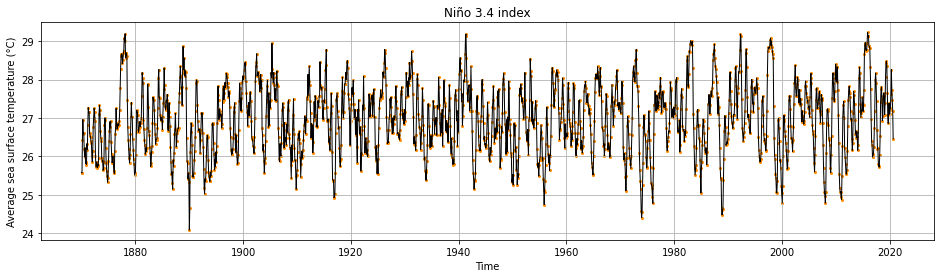

In [ ]:
# Plot the El Niño index
import matplotlib.pyplot as plt

plt.subplots(figsize=(16,4))
plt.plot(datetimes,data_1d,color='k',lw=1)   # color options: https://matplotlib.org/3.3.2/gallery/color/named_colors.html
plt.scatter(datetimes,data_1d,s=4,c='darkorange')
plt.title('Niño 3.4 index')
plt.xlabel('Time')
plt.ylabel('Average sea surface temperature (°C)')
plt.grid()

## In-class live coding

Note that we care about the state of El Niño in the Pacific Northwest because it affects our weather. For instance, we're currently in a La Niña state, which tends to bring colder, rainy weather to Seattle:

https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/enso_advisory/ensodisc.shtml

(722815.0, 737790.0)

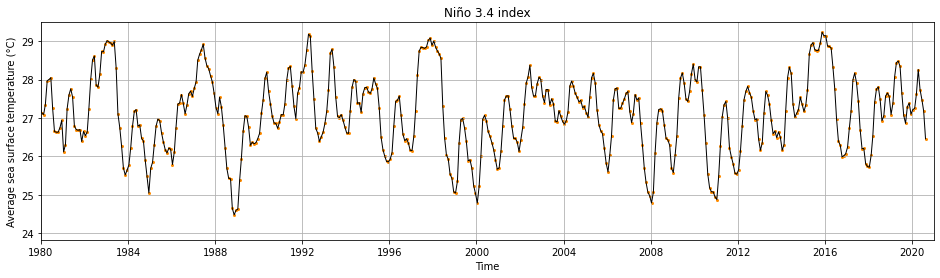

In [ ]:
# Goal: zoom into just a portion of the x-axis (years 1980-2020)

fig, ax = plt.subplots(figsize=(16,4))
plt.plot(datetimes,data_1d,c='k',lw=1)   # color options: https://matplotlib.org/3.3.2/gallery/color/named_colors.html
plt.scatter(datetimes,data_1d,s=4,c='darkorange')
plt.title('Niño 3.4 index')
plt.xlabel('Time')
plt.ylabel('Average sea surface temperature (°C)')
plt.grid()
# plt.xlim(datetime(1980,1,1),datetime(2020,12,31))             # Option 1 (call xlim() on the plt module)
# ax.set_xlim(datetime(1980,1,1),datetime(2020,12,31))          # Option 2 (call set_xlim() on the axes object saved from plt.subplots())
plt.gca().set_xlim(datetime(1980,1,1),datetime(2020,12,31))     # Option 3 (call set_xlim() on the current axes)

In [ ]:
# This is how we test for NaNs
# np.isnan() returns a boolean (True or False)
np.isnan(50)       # Returns False
np.isnan(np.nan)   # Returns True

# Calculate average value of El Niño index, ignoring NaN values
sum = 0.0
nan_counter = 0
for value in data_1d:
  if np.isnan(value):           # Notice the if-statement is inside the for-loop
    print('We found a NaN')
    nan_counter += 1
  else:                         # The else statement will be entered when "value" is not a NaN
    sum += value
print(sum)

average = sum / (len(data_1d) - nan_counter)   # Exclude NaN values from average (nan_counter is 4 here)
print(average)

# Round to one decimal place
print(round(average,1))

We found a NaN
We found a NaN
We found a NaN
We found a NaN
48753.1600000001
26.965243362831913
27.0


In [ ]:
# Shift El Niño index values down by the average temperature, so they're centered at y = 0
data_1d_shifted = data_1d.copy()
for index in range(len(data_1d)):
  data_1d_shifted[index] = data_1d_shifted[index] - average
  # Alternate way:
  # data_1d_shifted[index] -= average

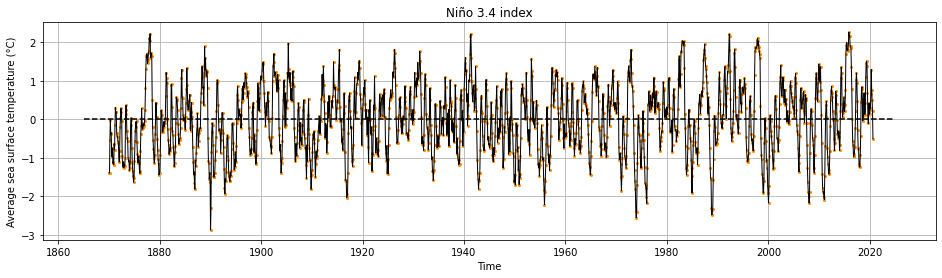

In [ ]:
# Add a horizontal line at y = 0
fig, ax = plt.subplots(figsize=(16,4))
plt.plot(datetimes,data_1d_shifted,c='k',lw=1)
plt.plot([datetime(1865,1,1),datetime(2025,1,1)],[0,0],ls='--',c='k')   # This is a line between two points at (1865,0) and (2025,0)
plt.scatter(datetimes,data_1d_shifted,s=4,c='darkorange')
plt.title('Niño 3.4 index')
plt.xlabel('Time')
plt.ylabel('Average sea surface temperature (°C)')
plt.grid()

In [ ]:
# Calculate average value of El Niño index using NumPy

# This won't work, because it will give the answer "NaN"...
average = np.mean(data_1d)
print('Option 1:',average)

# ... so we have slice out the NaNs
average = np.mean(data_1d[:-4])
print('Option 2:',average)

# Or we can get rid of the NaNs using conditional indexing
average = np.mean(data_1d[~np.isnan(data_1d)])     # Here, np.isnan(data_1d) returns a Boolean array,
                                                   # which we reverse using the tilde (~) to turn True to False, and False to True
print('Option 3:',average)

# Or we can ignore NaNs using the alternate NaN-excluding version of np.mean()
average = np.nanmean(data_1d)
print('Option 4:',average)

Option 1: nan
Option 2: 26.96524336283186
Option 3: 26.96524336283186
Option 4: 26.96524336283186
